In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed, randrange
from scipy import stats
from functions1 import *
%matplotlib inline
seed=1



In [2]:
x = np.arange(0, 1, 0.01)
y = np.arange(0, 1, 0.01)
#x = np.random.rand(100,1)
#y = np.random.rand(100,1)
#print(x)
#print(y)
x, y = np.meshgrid(x,y)
z = FrankeFunction(x, y) +0.02*np.random.randn(100,100)
#fig=plotTheSurface(x,y,z)
#fig.show()
#fig.savefig('Franke.png',DPI=(200))


#OSL regression




In [3]:
#transforming to a coluum vector in order to form an x_hat matrix
xVector=np.matrix.flatten(x)
yVector=np.matrix.flatten(y)
#vectorSize=np.size(yVector,0)
zVector=np.matrix.flatten(z)
sizeVector=np.size(zVector)
matrixSize=np.size(y,0)


In [4]:

 
# test cross validation split
indeces=np.linspace(0,sizeVector-1,sizeVector)
indeces=indeces.astype(int)
numberOfFolds=10
folds = k_folds_CV(indeces, numberOfFolds)

polynom_oders=[3,4,5]

In [5]:
zPredictmatrix,statsMatrix=olsModel(polynom_oders,xVector,yVector,zVector,numberOfFolds,folds,indeces)


STATS of MSE for polynom order 3 is:
DescribeResult(nobs=10, minmax=(0.00761438404282068, 0.009240187376073336), mean=0.008144861834524788, variance=2.3085753397965977e-07, skewness=1.2301483014728605, kurtosis=0.7434666865320958)
STATS of R2score for polynom order 3 is:
DescribeResult(nobs=10, minmax=(0.8931218046510714, 0.9082973108558019), mean=0.901526899671811, variance=2.3408983930292504e-05, skewness=-0.5963497437783801, kurtosis=-0.8004989351253622)


STATS of MSE for polynom order 4 is:
DescribeResult(nobs=10, minmax=(0.004024560678356498, 0.004666602756190235), mean=0.004386215415870508, variance=5.6199705240474807e-08, skewness=-0.11281772005957105, kurtosis=-1.5187011648073714)
STATS of R2score for polynom order 4 is:
DescribeResult(nobs=10, minmax=(0.9434946834091859, 0.9509051863417228), mean=0.9469570902217692, variance=6.460940842941253e-06, skewness=0.18471530426695704, kurtosis=-1.2970888793937947)


STATS of MSE for polynom order 5 is:
DescribeResult(nobs=10, minmax=

Bias^2 for the final model is: 24.478235102209272
Var for the final model is: 9.893987462977784e-07


/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


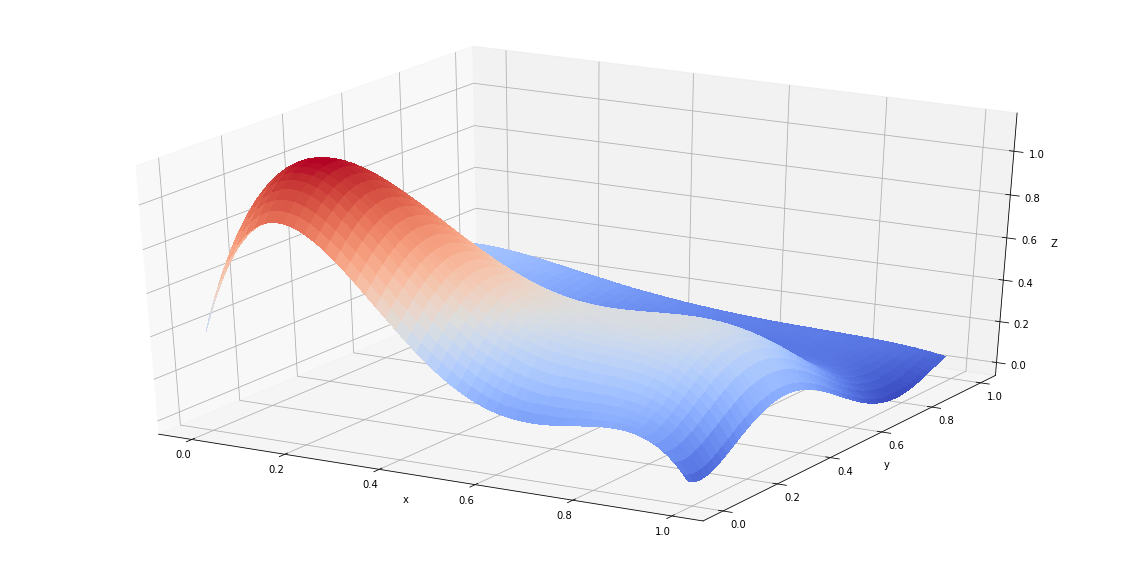

In [8]:
bias,var=computeBiasandVar(zPredictmatrix[:,:,2],zVector)
print('Bias^2 for the final model is: ' + str(bias))
print('Var for the final model is: ' + str(var))
z_pred=np.mean(zPredictmatrix[:,:,2],1)
matrixSize=np.size(y,0)
zPredictReshape=np.reshape(z_pred,(matrixSize,matrixSize))
fig1=plotTheSurface(x,y,zPredictReshape)
fig1.show()
#fig1.savefig('olsFranke.png')

In [14]:
np.sqrt(184)

13.564659966250536

In [ ]:
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.0001,normalize=True)
lassoreg.fit(xMatrix,zVector)
z_pred = lassoreg.predict(xMatrix)

In [ ]:
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0,normalize=True)
ridgereg.fit(xMatrix,zVector)
z_pred = ridgereg.predict(xMatrix)
print(MSE(zVector,z_pred))
print(r2score(zVector,z_pred))

In [ ]:
#printing results
lambda_values=[1e-3,1e-2,1e-1,1,10,1e2]
zPredictmatrix,statsMatrix=ridge_regress(lambda_values,polynom_oders,xVector,yVector,zVector,numberOfFolds,folds,indeces)
for j,order in enumerate(polynom_oders):
    for  h,lbd in enumerate(lambda_values): 
        print(lbd)
        print('Average of MSE for polynom order {} is:'.format(str(order)) + str(np.mean(statsMatrix[0,:,h,j])))
        print('Average of R2score for polynom order {} is:'.format(str(order)) + str(np.mean(statsMatrix[1,:,h,j])))
        print('\n')

bias,var=computeBiasandVar(zPredictmatrix[:,:,0,2],zVector)
print('Bias^2 for the final model is: ' + str(bias))
print('Var for the final model is: ' + str(var))
z_pred=np.mean(zPredictmatrix[:,:,0,2],1)
matrixSize=np.size(y,0)
zPredictReshape=np.reshape(z_pred,(matrixSize,matrixSize))
fig2=plotTheSurface(x,y,zPredictReshape)
fig2.show()
#fig2.savefig('RidgeFranke.png',DPI=(200))    

In [ ]:
zPredictmatrix,statsMatrix=lassoRegress(lambda_values,polynom_oders,xVector,yVector,zVector,numberOfFolds,folds,indeces)
for j,order in enumerate(polynom_oders):
    for  h,lbd in enumerate(lambda_values): 
        print(lbd)
        print('Average of MSE for polynom order {} is:'.format(str(order)) + str(np.mean(statsMatrix[0,:,h,j])))
        print('Average of R2score for polynom order {} is:'.format(str(order)) + str(np.mean(statsMatrix[1,:,h,j])))
        print('\n')

In [ ]:
bias,var=computeBiasandVar(zPredictmatrix[:,:,0,2],zVector)
print('Bias^2 for the final model is: ' + str(bias))
print('Var for the final model is: ' + str(var))
z_pred=np.mean(zPredictmatrix[:,:,0,2],1)
matrixSize=np.size(y,0)
zPredictReshape=np.reshape(z_pred,(matrixSize,matrixSize))
fig2=plotTheSurface(x,y,zPredictReshape)
fig2.show()
#fig2.savefig('LassoFranke.png')